In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

Loading Data

In [88]:
acqui = pd.read_csv('./acquisitions_update_2021.csv')
acqui.info()
acqui.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455 entries, 0 to 1454
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 1455 non-null   int64 
 1   Parent Company     1455 non-null   object
 2   Acquisition Year   1455 non-null   object
 3   Acquisition Month  1455 non-null   object
 4   Acquired Company   1455 non-null   object
 5   Business           1455 non-null   object
 6   Country            1455 non-null   object
 7   Acquisition Price  1455 non-null   object
 8   Category           1455 non-null   object
 9   Derived Products   1455 non-null   object
dtypes: int64(1), object(9)
memory usage: 113.8+ KB


,ID,Parent Company,Acquisition Year,Acquisition Month,Acquired Company,Business,Country,Acquisition Price,Category,Derived Products
0,1,Apple,1988,Mar,Network Innovations,Software,-,-,-,-
1,2,Apple,1988,Jun,Orion Network Systems,Computer Software,-,-,-,-
2,3,Apple,1988,Jun,Styleware,Computer software,-,-,-,-
3,4,Apple,1988,Jul,Nashoba Systems,Computer software,-,-,-,-
4,5,Apple,1989,Jan,Coral Software,Computer software,-,-,-,-


Data Cleaning 

In [89]:
acqui = acqui.set_index('ID')

In [35]:
acqui['Parent Company'].value_counts()

Microsoft     258
Google        244
Ibm           182
Hp            129
Apple         123
Amazon        108
Facebook       93
Twitter        65
Ebay           63
Adobe          52
Citrix         52
Redhat         35
Blackberry     32
Disney         19
Name: Parent Company, dtype: int64

Only Disney company is not a tech firm. 
Selecting targets for investigation : Microsoft Company and since acquisition year 2000. 

In [90]:
tech_acqui = acqui[acqui['Parent Company'] != 'Disney']
tech_2000 = tech_acqui[tech_acqui['Acquisition Year'] >= '2000']

In [94]:
microsoft = tech_2000[tech_2000['Parent Company'] == 'Microsoft']
microsoft.rename(columns={'Acquisition Year' : 'Year'}, inplace=True)
microsoft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211 entries, 717 to 927
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Parent Company     211 non-null    object
 1   Year               211 non-null    object
 2   Acquisition Month  211 non-null    object
 3   Acquired Company   211 non-null    object
 4   Business           211 non-null    object
 5   Country            211 non-null    object
 6   Acquisition Price  211 non-null    object
 7   Category           211 non-null    object
 8   Derived Products   211 non-null    object
dtypes: object(9)
memory usage: 16.5+ KB


/var/folders/tm/dj0qxgcn4j75czpgvwyxxztc0000gn/T/ipykernel_19494/503060579.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  microsoft.rename(columns={'Acquisition Year' : 'Year'}, inplace=True)


In [117]:
microsoft['Business'].values
#the sum of business type of all acquired firms

array(['Wholesale drawing software', 'Digital TV services',
       'Internet service provider', 'Cable television', 'Video games',
       'Software', 'Online music search engine',
       'Digital audio technology', 'Video games',
       'Internet service provider', 'Business management software',
       'Software', 'Video games', 'Internet software', 'Software',
       'Online Spanish portal', 'Travel agency', 'Software',
       'Software programming', 'Computer consulting', 'Security software',
       'Video games', 'Online enterprise location', 'Software',
       'Internet software', 'Web conferencing', 'Information technology',
       'Antivirus technology', 'Software', 'IP assets',
       'Reporting systems', 'Personal search tool', 'Anti-spyware',
       'Software', 'Community software', 'Messaging', 'Certain assets',
       'Software', 'VoIP', 'Email protection',
       'Certificate management software', 'Software', 'Mobile',
       'Software', 'Search', 'Software', 'Software', '

In [118]:
microsoft['Business'].value_counts()

Software                                   23
Video games                                16
Applications                                3
Internet software                           3
5G Networking                               3
                                           ..
Mobile Internet software                    1
Enterprise search[clarification needed]     1
Management software                         1
Mobile applications                         1
Productivity                                1
Name: Business, Length: 162, dtype: int64

Triple-Annually Analysis

In [96]:
microsoft0003 = microsoft[microsoft['Year'] <= '2003']
microsoft0003.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 717 to 745
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Parent Company     29 non-null     object
 1   Year               29 non-null     object
 2   Acquisition Month  29 non-null     object
 3   Acquired Company   29 non-null     object
 4   Business           29 non-null     object
 5   Country            29 non-null     object
 6   Acquisition Price  29 non-null     object
 7   Category           29 non-null     object
 8   Derived Products   29 non-null     object
dtypes: object(9)
memory usage: 2.3+ KB


<Axes: title={'center': 'Business of Firms Acquired between 2000-2003'}>

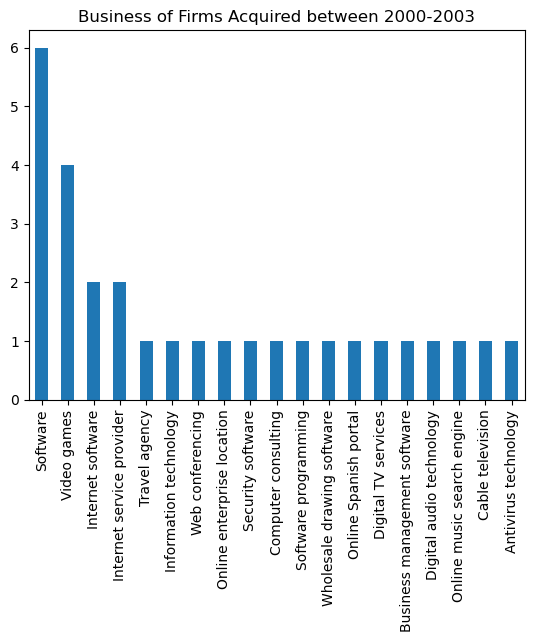

In [97]:
microsoft0003['Business'].value_counts().plot(kind='bar', title="Business of Firms Acquired between 2000-2003")

<Axes: title={'center': 'Business of Firms Acquired between 2004-2006'}>

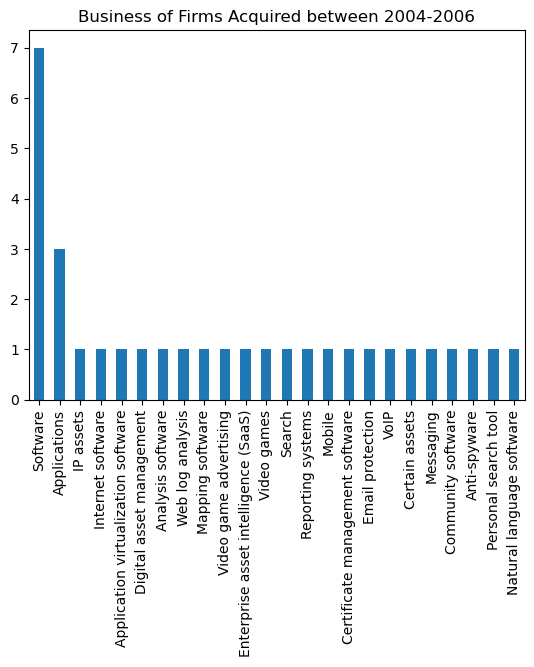

In [101]:
microsoft0406 = microsoft.query("'2004' <= Year <= '2006'")
microsoft0406['Business'].value_counts().plot(kind='bar', title="Business of Firms Acquired between 2004-2006")

<Axes: title={'center': 'Business of Firms Acquired between 2007-2009'}>

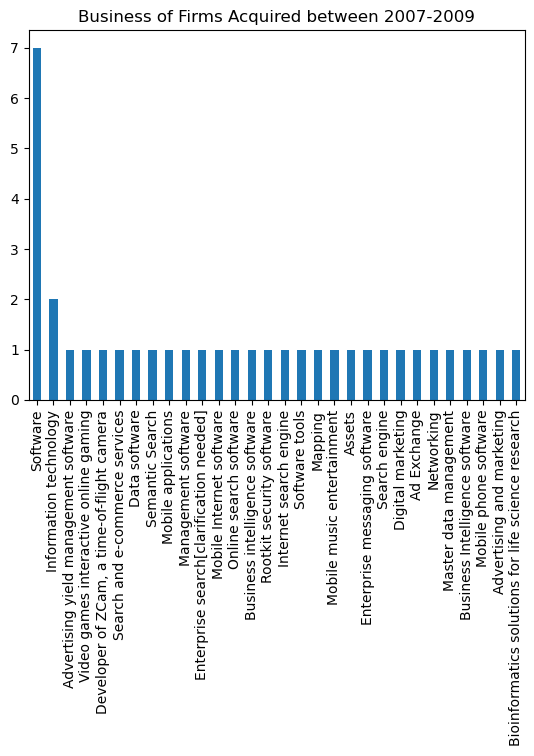

In [107]:
microsoft0709 = microsoft.query("'2007' <= Year <= '2009'")
microsoft0709['Business'].value_counts().plot(kind='bar', title="Business of Firms Acquired between 2007-2009")

<Axes: title={'center': 'Business of Firms Acquired between 2010-2012'}>

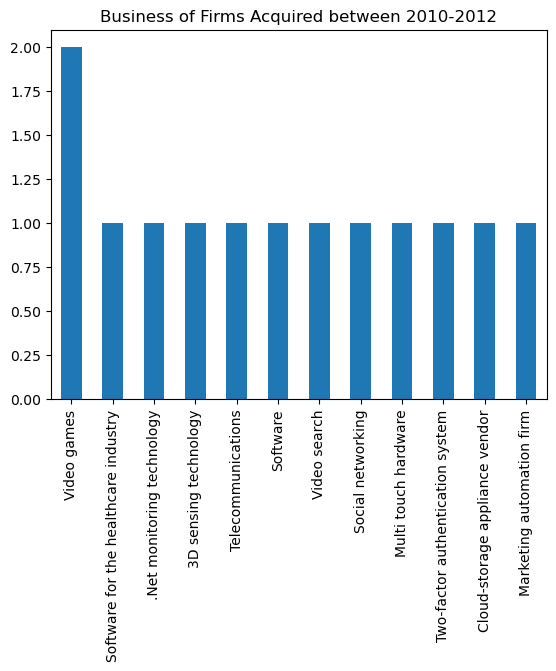

In [109]:
microsoft1012 = microsoft.query("'2010' <= Year <= '2012'")
microsoft1012['Business'].value_counts().plot(kind='bar', title="Business of Firms Acquired between 2010-2012")

In [111]:
microsoft1315 = microsoft.query("'2013' <= Year <= '2015'")
microsoft1315['Business'].value_counts()

Home automation                                              1
Statistical computing and predictive analytics               1
Styli and pen input hardware and software                    1
PowerPoint collaboration                                     1
Mobile business intelligence & data visualization            1
Wunderlist to-do list applications                           1
Application management                                       1
Enterprise field service                                     1
Cloud security                                               1
Sales-gamification                                           1
Organisational analytics                                     1
Mobile lock screen software                                  1
Web portal and application lifecycle management solutions    1
Video game physics engine                                    1
MileIQ, a mileage tracking application                       1
Data protection                                        

<Axes: title={'center': 'Business of Firms Acquired between 2016-2018'}>

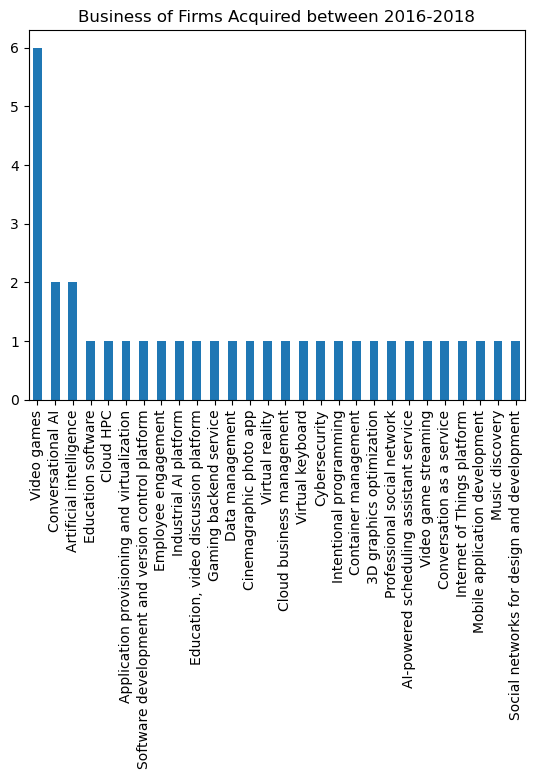

In [112]:
microsoft1618 = microsoft.query("'2016' <= Year <= '2018'")
microsoft1618['Business'].value_counts().plot(kind='bar', title="Business of Firms Acquired between 2016-2018")

<Axes: title={'center': 'Business of Firms Acquired between 2019-2021'}>

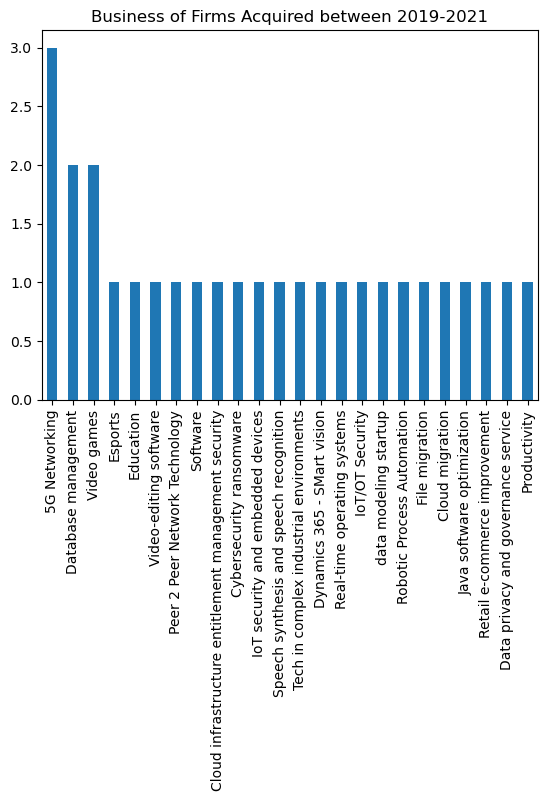

In [113]:
microsoft1921 = microsoft.query("'2019' <= Year <= '2021'")
microsoft1921['Business'].value_counts().plot(kind='bar', title="Business of Firms Acquired between 2019-2021")

In [115]:
microsoft1921.query("Business == '5G Networking'")

,Parent Company,Year,Acquisition Month,Acquired Company,Business,Country,Acquisition Price,Category,Derived Products
ID,,,,,,,,,
909,Microsoft,2020,Mar,Affirmed Networks,5G Networking,-,1350000000,-,-
910,Microsoft,2020,May,Metaswitch Networks,5G Networking,-,-,-,-
920,Microsoft,2021,Jun,AT&T Technology Network Cloud,5G Networking,-,-,-,-


From the plots or table summary for these triple-annually periods, I found the following facts:
1. Microsoft has, so far, acquisited over 162 industries, with Sotware and Video Games occupying the first two most-frequently acquisited business industry, 23 and 16 respectively.  The acquisited firms covered the indsutries from software to telecommunication to mobile to cyber security to cloud data management to analysis tool to education. Through the acquisition, Microsoft not only expand its business range, but also fortify its own core products. For example, the acquisition of Adallom firm helped Microsoft to strengthen its own cloud app. 
2. Before 2010, the focus of Microsoft's acquisition was on Software Industry. The number of such acquisitions droped from 7 to 2 during the ten years. I might surmise that the declination was due to the 2009 global financial crisis. 
3. After 2010, the focus shifted to video games. The acquisition of video games business firms reached a peaked during 2016-2018 period. Based on my pre-survey, Xbox games studio made a huge amount of acquisiton deals in 2018, which further validates the data. Video game studios such as Obsidian Entertainment, Playground games, Ninja Theory, and InXile Entertainment were all purchased in 2018. There was huge cash flow in 2018 for acquisition. 
4. Starting from 2020, the focus slightly shifted again from video games to 5G networking.
5. The transition of the acquisition's focus of Microsoft reflects the contemperory hot industries: from Software to Video games to 5G networking. 